In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [142]:
f = np.load('/Users/abdussamad/Documents/Github repos/portfolio-manager/BackTest/inputs.npz')

In [26]:
f.files

['arr_0', 'arr_1']

In [143]:
Xs, ys = f['arr_0'], f['arr_1']

(array([1.170000e+02, 2.672700e+04, 1.045875e+06, 3.941000e+03,
        1.340000e+02, 2.700000e+01, 7.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([-0.8580644 , -0.48589471, -0.11372503,  0.25844465,  0.63061433,
         1.00278402,  1.3749537 ,  1.74712338,  2.11929307,  2.49146275,
         2.86363243]),
 <BarContainer object of 10 artists>)

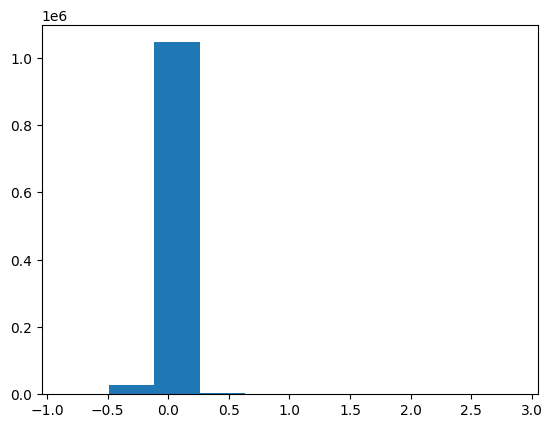

In [103]:
plt.hist(ys)

In [33]:
Xs[:, 0, 1].reshape(-1, 1, 1)

array([[[16.30069273]],

       [[ 0.98756392]],

       [[23.47888866]],

       ...,

       [[18.26986162]],

       [[18.37410711]],

       [[ 2.116667  ]]])

In [144]:
scales = Xs[:, 0, 1].reshape(-1, 1, 1).copy()
Xs[:, :, [5]] /= scales
Xs[:, :, :4] /= scales

In [141]:
Xs[bad_idx]

array([[12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        11.64678805],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        11.71085819],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        11.76927237],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        11.8225299 ],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        11.87108598],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        11.91535565],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        11.95571731],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        11.99251594],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        12.02606608],
       [12.372569  , 12.372569  , 12.372569  , 12.372569  ,  0.        ,
        12.05665449],
       [12.372569  , 12.372569  , 12.372569  , 12.

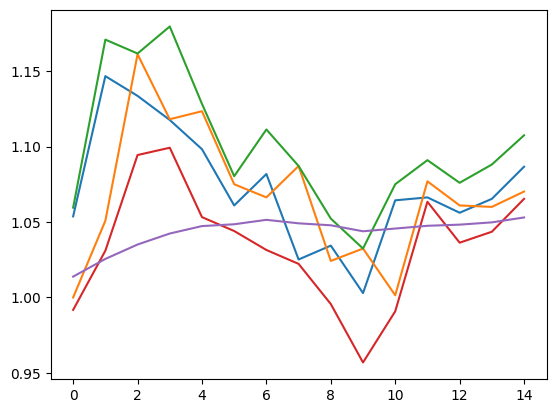

In [145]:
for i in range(4):
    plt.plot(Xs[399950, :, i])
plt.plot(Xs[399950, :, 5])    

In [95]:
def bresenham(img, x0, y0, x1, y1):
    dx = abs(x1 - x0)
    sx = 1 if x0 < x1 else -1 
    dy = -abs(y1 - y0)
    sy = 1 if y0 < y1 else -1
    error = dx + dy

    while True:
        img[x0, y0] = 255
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * error
        if e2 >= dy:
            if x0 == x1:
                break 
            error += dy
            x0 += sx
        if e2 <= dx:
            if y0 == y1:
                break
            error += dx
            y0 += sy

def make_image(sample, ema=True, volume=True):
    height_bars = 96
    width = sample.shape[0] * 3
    img_ohlc = np.zeros((width, height_bars), dtype=np.uint8)

    max_price = max(sample[:, :4].max(), sample[:, 5].max())
    min_price = min(sample[:, :4].min(), sample[:, 5].min())
    height_scaler = (height_bars - 1) / (max_price - min_price)

    ema_y_prev = None

    for t in range(sample.shape[0]):
        open_y = round((sample[t, 1] - min_price) * height_scaler)
        img_ohlc[3*t, open_y] = 255
        close_y = round((sample[t, 0] - min_price) * height_scaler)
        img_ohlc[3*t+2, close_y] = 255

        low_y = round((sample[t, 3] - min_price) * height_scaler)
        high_y = round((sample[t, 2] - min_price) * height_scaler)
        img_ohlc[3*t+1, low_y:high_y] = 255

        if ema:
            ema_y = round((sample[t, 5] - min_price) * height_scaler)
            img_ohlc[3*t+1, ema_y] = 255
            if ema_y_prev is not None:
                bresenham(img_ohlc, 3*t-2, ema_y_prev, 3*t+1, ema_y)
            ema_y_prev = ema_y

    if not volume:
        return img_ohlc.T
    
    height_vol = 24
    height_whole = height_bars + height_vol if volume else 0
    img_whole = np.zeros((width, height_whole), dtype=np.uint8)
    img_whole[:, :height_bars] = img_ohlc

    max_vol = sample[:, 4].max()
    vol_scaler = (height_vol - 1)/max_vol 
    for t in range(sample.shape[0]):
        vol_y = round(sample[t, 4] * vol_scaler)
        img_whole[3*t+1, height_whole-vol_y-1:height_whole-1] = 255

    return img_whole.T



In [146]:
ys_pt = torch.LongTensor(ys > 0)
xs_pt = torch.zeros(size=(Xs.shape[0], 120, 45), dtype=torch.uint8)

In [138]:
bad_idx = i

In [100]:
x[:, 4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
Xs.shape

(1076831, 15, 6)

In [147]:
for i in range(Xs.shape[0]):
    assert Xs[bad_idx, :, 5].sum() > 0
    xs_pt[i] = torch.tensor(make_image(Xs[i]))

In [136]:
bad_idx

3

In [81]:
x[:, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
images = [make_image(x) for x in Xs]

/var/folders/3f/h9wnsbdj1d3bl3lmf95q_ktw0000gn/T/ipykernel_7095/1721128109.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  vol_scaler = (height_vol - 1)/max_vol
/var/folders/3f/h9wnsbdj1d3bl3lmf95q_ktw0000gn/T/ipykernel_7095/1721128109.py:63: RuntimeWarning: invalid value encountered in scalar multiply
  vol_y = round(sample[t, 4] * vol_scaler)


ValueError: cannot convert float NaN to integer

In [60]:
class StockCNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=(5, 3), padding=1),
            torch.nn.LeakyReLU(negative_slope=0.01, inplace=True),
            torch.nn.MaxPool2d((2, 1))
        )
        self.block2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=(5, 3), padding=1),
            torch.nn.LeakyReLU(negative_slope=0.01, inplace=True),
            torch.nn.MaxPool2d((2, 1))
        )
        self.out_block = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(161280, 2),
            torch.nn.Softmax(dim=-1))

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.out_block(x)
        return x

In [49]:
batch_pt = torch.stack([torch.FloatTensor(x)/255.0 for x in batch])
batch_pt = batch_pt.unsqueeze(dim=1)

In [50]:
batch_pt.shape

torch.Size([72, 1, 120, 45])

In [61]:

r = m(batch_pt)

In [ ]:
BATCH_SIZE = 128
EPOCHS = 100
LEARNING_RATE = 0.001

m = StockCNN()
opt = torch.optim.Adam(m.parameters())
loss_fn = torch.nn.CrossEntropyLoss()



In [62]:
r.shape

torch.Size([72, 2])

In [57]:
128 * 28 * 45

161280

In [35]:
batch_pt.shape

torch.Size([72, 120, 45])

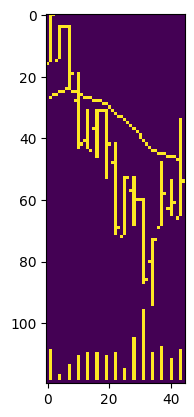

In [26]:
(1.0579706111328149 - 0.9999994104739358) * 1655.9946819955387

96.0

In [21]:
max_price = max(x[:, :4].max(), x[:, 5].max())
min_price = min(x[:, :4].min(), x[:, 5].min())

In [22]:
max_price

1.0579706111328149

In [23]:
min_price

0.9999994104739358

In [20]:
x

array([[1.01449275e+00, 1.00000000e+00, 1.02173959e+00, 1.00000000e+00,
        8.32000000e+04, 1.03534132e+00],
       [9.99999410e-01, 9.99999410e-01, 1.05797039e+00, 9.99999410e-01,
        3.84000000e+04, 1.03222143e+00],
       [1.02898501e+00, 9.99999518e-01, 1.02898501e+00, 9.99999518e-01,
        9.44000000e+04, 1.03193573e+00],
       [1.02898501e+00, 1.02898501e+00, 1.02898501e+00, 9.99999518e-01,
        1.12000000e+05, 1.03167524e+00],
       [1.02898501e+00, 9.99999518e-01, 1.02898501e+00, 9.99999518e-01,
        2.56000000e+04, 1.03143776e+00],
       [1.05797061e+00, 9.99999619e-01, 1.05797061e+00, 9.99999619e-01,
        4.16000000e+04, 1.03378001e+00],
       [9.99999410e-01, 9.99999410e-01, 9.99999410e-01, 9.99999410e-01,
        1.60000000e+03, 1.03079794e+00],
       [9.99999410e-01, 1.02898490e+00, 1.02898490e+00, 9.99999410e-01,
        1.60000000e+04, 1.02807913e+00],
       [1.05797061e+00, 9.99999619e-01, 1.05797061e+00, 9.99999619e-01,
        7.84000000e+04, 

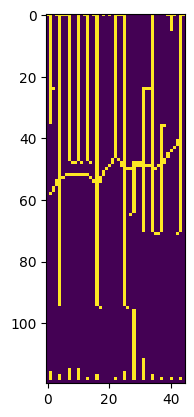

In [32]:
plt.imshow(make_image(x))

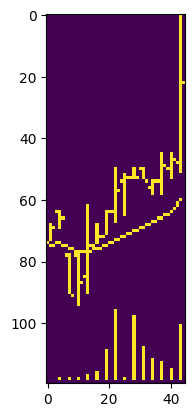

In [31]:
plt.imshow(make_image(Xs[1843]))

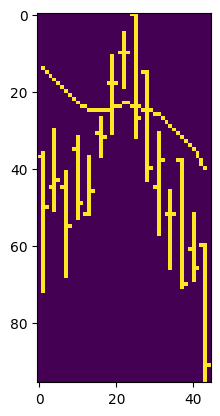

In [85]:
plt.imshow(make_image(Xs[18343]))

In [20]:
price_series = np.cumprod(Xs2 + 1, axis=-1)

In [9]:
Xs[:10]

array([[-0.00187236,  0.01313282,  0.00555563, -0.00506409,  0.02174886,
         0.        ,  0.00905817,  0.        , -0.01256736, -0.0181821 ,
         0.00925947,  0.00366944, -0.00182763,  0.00366266, -0.00729888],
       [ 0.02777786,  0.        , -0.02027008, -0.00689683,  0.        ,
         0.        , -0.00694473,  0.        ,  0.00699329, -0.02951379,
        -0.00536614,  0.00719345,  0.02500048, -0.0243907 , -0.0142863 ],
       [-0.0050378 ,  0.        , -0.00759476, -0.03571451,  0.04232839,
        -0.02030505,  0.0116581 ,  0.01152384,  0.01265867, -0.04625027,
        -0.00262104,  0.02496678, -0.00512796, -0.00896358, -0.01958174],
       [-0.00823103, -0.00414916, -0.01666682, -0.01694911,  0.01724133,
         0.00847497, -0.01470625, -0.00852813, -0.0064518 ,  0.02597373,
         0.01687738,  0.01659808, -0.03061215,  0.01052587, -0.0312495 ],
       [ 0.01388905,  0.04109589, -0.01315849,  0.0399998 , -0.0064099 ,
         0.        , -0.02580632, -0.00662282, 